# 웹 문서 전체 가져오기

* BeautifulSoup 객체: 웹 문서를 파싱한 상태. 웹 문서가 태그 별로 분해되어 트리가 생성됨. 

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

# 원하는 주소로부터 웹페이지 load
html = urlopen("http://webtoon.daum.net/")

# BeautifulSoup을 이용해 웹문서 파싱
bsObject = BeautifulSoup(html, "html.parser")
print(bsObject)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Daum 웹툰" property="title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="description"/>
<meta content="Daum 웹툰" property="og:title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="og:description"/>
<meta content="http://u1.daumcdn.net/webtoon/op/webtoon_home_text_ver_20190514.png" property="og:image"/>
<meta content="Daum 웹툰" property="og:site_name"/>
<meta content="http://webtoon.daum.net" id="ogUrl" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="eIXFx7xW9i-ILPA5sFkGw9t2O8xyctRXcstOygB_s-A" name="google-site-verification">
<title>Daum 웹툰</title>
<link href="http://s1.daumcdn.net/photo-section/-cartoon10/favicon/201312/favicon.ico" rel="shortcut icon"/>
<link href="https://t1.daumcdn.net/webtoon/cssjs/20210630101418/common.css" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]>
	<script type="text/javascript" src="http

### 예제) 월요일 

In [2]:
'''
<html>
  <head>...</head>
  <body>
    <div id="daumWrap">
      <div id="daumContent">
        <div id="cMain">
          <div class="cont_schedule">
            <div data-view="day">
              <div class = "wrap_webtoon">
                <strong class = "screen_out">요일별 웹툰 리스트</strong>
                <ul id="dayList1" class="list_wt">...</ul> ################## 여기
              </div>
              <ul id="dayList2" class="list_wt">...</ul>   ################## 여기
            </div>
            ...    
    </div> 
    <script>...</script>
  </body>
</html>
'''

monday = urlopen('http://webtoon.daum.net/#day=mon&tab=day')
Mon = BeautifulSoup(monday, "html.parser")
print(Mon)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Daum 웹툰" property="title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="description"/>
<meta content="Daum 웹툰" property="og:title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="og:description"/>
<meta content="http://u1.daumcdn.net/webtoon/op/webtoon_home_text_ver_20190514.png" property="og:image"/>
<meta content="Daum 웹툰" property="og:site_name"/>
<meta content="http://webtoon.daum.net" id="ogUrl" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="eIXFx7xW9i-ILPA5sFkGw9t2O8xyctRXcstOygB_s-A" name="google-site-verification">
<title>Daum 웹툰</title>
<link href="http://s1.daumcdn.net/photo-section/-cartoon10/favicon/201312/favicon.ico" rel="shortcut icon"/>
<link href="https://t1.daumcdn.net/webtoon/cssjs/20210630101418/common.css" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]>
	<script type="text/javascript" src="http

In [3]:
titles = Mon.select('#cMain > div.cont_schedule > div:nth-child(2)')
for title in titles:
    print(title.text)
    print(title.get('href'))



월
화
수
목
금
토
일



요일별 웹툰 리스트




None


- 웹툰 리스트들이 자바스크립트로 추가가 되어 있기 때문에 페이지 소스 보기로 html 코드를 보면 원하는 정보가 나오지 않음
- requests로 소스를 가져오면 자바스크립트가 적용되기 전의 html 소스(= 페이지 소스 보기)를 가져오기 때문에 page_source를 이용해서 html소스(= 개발자 도구)를 가져와야 함


https://yeeybook.tistory.com/140?category=882625 참고

In [4]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# webdriver_manager를 사용해 execution_path 변수를 설정
# 스크립트를 실행할 때 자동으로 드라이버 다운로드
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("http://webtoon.daum.net/#day=tue&tab=day")



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\gunso\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Daum 웹툰" property="title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="description"/>
<meta content="Daum 웹툰" property="og:title"/>
<meta content="상상이 시작되는 곳 Daum 웹툰" property="og:description"/>
<meta content="http://u1.daumcdn.net/webtoon/op/webtoon_home_text_ver_20190514.png" property="og:image"/>
<meta content="Daum 웹툰" property="og:site_name"/>
<meta content="http://webtoon.daum.net" id="ogUrl" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="eIXFx7xW9i-ILPA5sFkGw9t2O8xyctRXcstOygB_s-A" name="google-site-verification"/>
<title>Daum 웹툰</title>
<link href="http://s1.daumcdn.net/photo-section/-cartoon10/favicon/201312/favicon.ico" rel="shortcut icon"/>
<link href="https://t1.daumcdn.net/webtoon/cssjs/20210630101418/common.css" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]>
	<script type="text/javascript" src="http://s1.daumcdn.net/
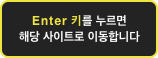

In [5]:
html = driver.page_source
Mon = BeautifulSoup(html, 'html.parser')
print(Mon)

In [6]:
elements = Mon.select('#cMain > div.cont_schedule > div:nth-child(2)')

# find_all('태그명', {'속성명': '값' ...})
#elements = Mon.select('#cMain > div.cont_schedule > div:nth-child(2)')
titles = Mon.find_all('strong', {'class':'tit_wt'})
print(len(titles))
for title in titles:
    #print(title)
    adult = title.find('span', {'class': "ico_comm ico_adult"})
    if adult is not None:
        print(adult.text)
        t = title.text[2:]
        print(t)
    else:
        print(title.text)

20
악한 기사
해피하우스
환상의 아이들
기프트
골드핸즈
개목걸이
대선비쇼에 어서오세요!
사랑하는 존재
비밀 사이
아싸클럽
뱀파이어 신드롬
화폐개혁
그녀의 앵무새
닥터 파인의 하루
성인
단두 (斷頭)
신성한, 이혼
우리집이거든요!
아비무쌍
지옥사원
딩스뚱스


In [7]:
authors = Mon.find_all('span', {'class':'txt_info'})
print(len(authors))
for author in authors:
    print(author.text[2:])

20
 글가애/김랄라
 장삥준
 김다
 정이리이리
 박하
 김종욱/만두
 아람
 향유 크리에이티브
 맥퀸스튜디오
 랑쓰
 이충호
 윤필/임정호
 금계수
 김용회
 붉은 발/이동욱
 강태경
 공룡
 노경찬/이현석
 네온비/캐러멜
 딩스


In [8]:
thumbnails = Mon.find_all('img', {'class': "img_thumb"})
print(type(thumbnails[0]))
print(len(thumbnails))
print(len(titles)+5-5)
for i in range(5,len(titles)+5):
    thumb = thumbnails[i]['src']
    print(thumb)

<class 'bs4.element.Tag'>
36
20
http://t1.daumcdn.net/webtoon/op/31ef5679a07e12a82069c786dde2ae617e2e850f
http://t1.daumcdn.net/webtoon/op/adc6e39cde3b50e9a082494ec42f09566f75729d
http://t1.daumcdn.net/webtoon/op/e4c1f278570ce99f8ef939f8476c3afd1345c746
http://t1.daumcdn.net/webtoon/op/7c970300ffb2c5850c0274c6658d2855a395c3da
http://t1.daumcdn.net/webtoon/op/28f01861cb92ba7c73525730805350100fd19eec
http://t1.daumcdn.net/webtoon/op/917fca8008aede1baab5f3a3b191439f44f8f38f
http://t1.daumcdn.net/webtoon/op/6cb578e58950c20cc7064547df67694a18df3aae
http://t1.daumcdn.net/webtoon/op/97c448b241bb5a881491be302a61ba19829e236a
http://t1.daumcdn.net/webtoon/op/51bd8f2255ac5ea4bfd438cfd06296f2c1554747
http://t1.daumcdn.net/webtoon/op/3e479b19fd455f35c6dea335f812fa3ac3f8272e
http://t1.daumcdn.net/webtoon/op/b93712dfdaeefa2363deb56e1491e464cc09e8b2
http://t1.daumcdn.net/webtoon/op/ad075f7e41d13de021aa7d608006b2251c4ea1c2
http://t1.daumcdn.net/webtoon/op/35c3c85f9ebd9b1a7309216f71f687731c6688d9
http:/

In [9]:
#<a href="/webtoon/view/dormitory" class="link_wt">
newlink_match = Mon.find_all('a', {'class': 'link_wt'})
print(len(newlink_match))
for i in range(0, len(titles)):
    print(newlink_match[i]['href'])

30
/webtoon/view/evilknight
/webtoon/view/happyhouse
/webtoon/view/visionchildren
/webtoon/view/gift
/webtoon/view/goldhands
/webtoon/view/dogcollar
/webtoon/view/sunbishow
/webtoon/view/loving
/webtoon/view/secretrelation
/webtoon/view/outsiderclub
/webtoon/view/vampiresyndrome
/webtoon/view/denomination
/webtoon/view/parrot
/webtoon/view/drfine
/webtoon/view/beheaded
/webtoon/view/sacreddivorce
/webtoon/view/thisismyhome
/webtoon/view/Matchless
/webtoon/view/hellTemple
/webtoon/view/dings


In [10]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep

email = 'gunsong2@kakao.com'
pw = 'kvo20175607!'

for pIdx in range(0, len(titles)):
    login_check = False
    
    page = WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'link_wt')))[:-10]
    print(pIdx, len(page))
    page[pIdx].click()
    link = driver.current_url
        
    print(link)
    # 성인물인 경우 로그인이 필요함
    if link[8:14] == "logins":
        login_check = True
        driver.find_element_by_css_selector('#mArticle > div.section_login > div > div > div.login_account > a.link_login.link_klogin').click()
        driver.find_element_by_name('email').send_keys(email)
        driver.find_element_by_name('password').send_keys(pw)
        driver.find_element_by_css_selector('#login-form > fieldset > div.wrap_btn > button.btn_g.btn_confirm.submit').click()
        print("login 해야한다!!!")
        
    WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'txt_genre')))
    WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'txt_story')))
    WebDriverWait(driver, 15).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'emph_grade')))
    html =  driver.page_source
    bsObject = BeautifulSoup(html, 'html.parser')
    
    # 장르
    genre = bsObject.find('dd', {'class': 'txt_genre'}).text.strip()
    print(genre)
    
    # 줄거리
    story = bsObject.find('dd', {'class' : 'txt_story'}).text # 줄거리 수집
    print(story)

    # 평점
    rate = bsObject.find('em', {'class':'emph_grade'})
    print(rate.text)

    if login_check:
        driver.back()
        driver.back()
    driver.back()
    sleep(0.5)
    print(driver.current_url)


0 20
http://webtoon.daum.net/webtoon/view/evilknight
순정, 판타지, 복수
대형견 순정남 황제와 악바리 기사의 로맨스
9.5
http://webtoon.daum.net/#day=tue&tab=day
1 20
http://webtoon.daum.net/webtoon/view/happyhouse
스릴러, 드라마, 비밀
인생 패배자 고덕봉, 현실에서 도망쳐 온 폐가의 귀신으로 거듭나며 제 2의 인생을 찾는 듯 하다.
9.7
http://webtoon.daum.net/#day=tue&tab=day
2 20
http://webtoon.daum.net/webtoon/view/visionchildren
학원, 공포, 퇴마
귀신이라면 지긋지긋한 태경, 저주받은 학교에서 귀신보다 위험한 놈과 엮였다
9.8
http://webtoon.daum.net/#day=tue&tab=day
3 20
http://webtoon.daum.net/webtoon/view/gift
스포츠, 드라마, 능력
선수들의 등급과 능력을 볼 수 있는 감독과, 선수들의 고교야구 이야기
9.8
http://webtoon.daum.net/#day=tue&tab=day
4 20
http://webtoon.daum.net/webtoon/view/goldhands
순정, 드라마, 예술
미술에 재능을 가진 '이그린'과 스타작가 '남현'의 비밀스러운 합작 프로젝트
9.7
http://webtoon.daum.net/#day=tue&tab=day
5 20
http://webtoon.daum.net/webtoon/view/dogcollar
액션, 학원, 일진
저마다의 사정으로 피 튀는 싸움판에 뛰어든 소년들. 갖고 싶다면 뺏어라!
9.3
http://webtoon.daum.net/#day=tue&tab=day
6 20
http://webtoon.daum.net/webtoon/view/sunbishow
드라마, 코믹, 음식
유도선수를 그만두고 졸업을 기다리던 황희는 PD지망생 요한을 만나